In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection

import warnings
warnings.filterwarnings("ignore")

In [21]:
train_df = pd.read_csv(
    "train.csv"
)

test_df = pd.read_csv(
    "test.csv"
)

sub_df = pd.read_csv(
    "sample_submission.csv"
)

In [22]:
train_df.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,...,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,...,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae


In [23]:
test_df.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,...,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,...,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,...,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,...,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,...,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,...,-0.000043,-0.000086,-0.000043,-0.000086,0.000914,-0.000043,-0.000010,-0.000010,0.000990,-9.536743e-07


In [24]:
sub_df.head()

,row_id,target
0,200000,Streptococcus_pneumoniae
1,200001,Streptococcus_pneumoniae
2,200002,Streptococcus_pneumoniae
3,200003,Streptococcus_pneumoniae
4,200004,Streptococcus_pneumoniae


In [25]:
print(train_df.shape, test_df.shape)

(200000, 288) (100000, 287)


In [44]:
train_df.count().sum()

57600000

In [47]:
train_df.isna().sum().sum()

0

<AxesSubplot:>

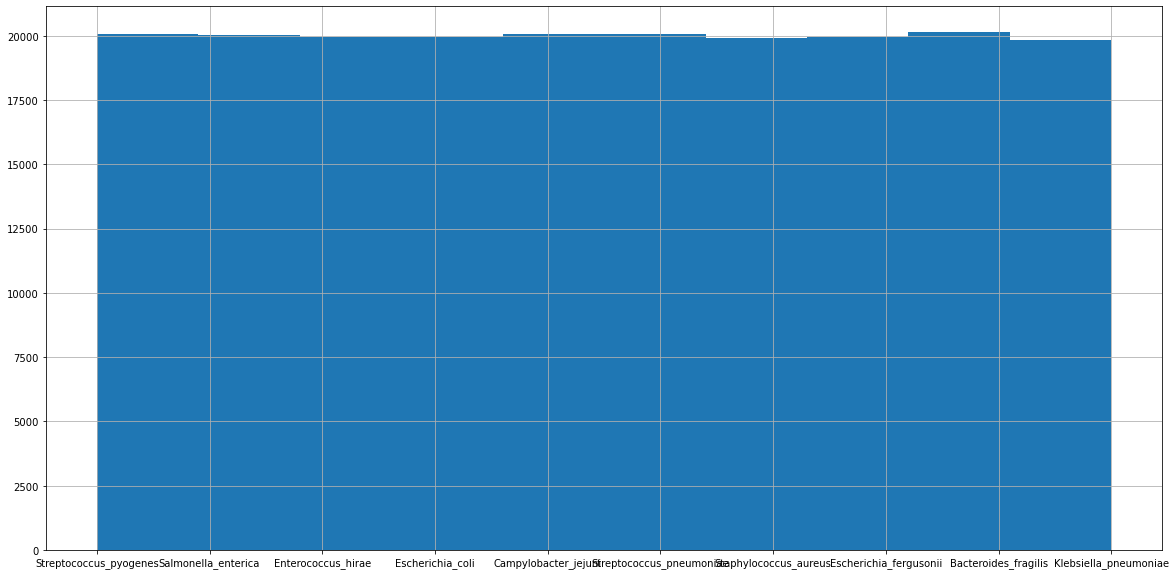

In [37]:
train_df["target"].hist(figsize=(20,10))

<AxesSubplot:xlabel='target', ylabel='count'>

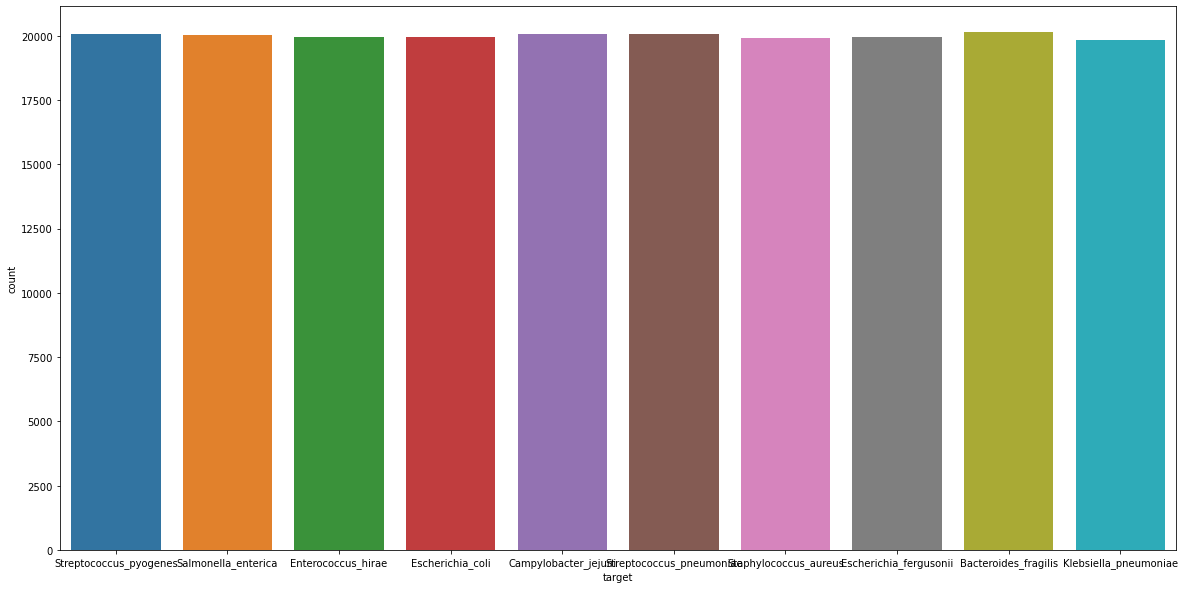

In [41]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(train_df["target"], ax=ax)

In [49]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,200000.0,9.999950e+04,57735.171256,0.000000e+00,4.999975e+04,9.999950e+04,1.499992e+05,199999.000000
A0T0G0C10,200000.0,6.421457e-07,0.000087,-9.536743e-07,-9.536743e-07,-9.536743e-07,-9.536743e-07,0.009999
A0T0G1C9,200000.0,-3.076578e-06,0.000132,-9.536743e-06,-9.536743e-06,-9.536743e-06,-2.536743e-06,0.009990
A0T0G2C8,200000.0,-1.429921e-05,0.000287,-4.291534e-05,-4.291534e-05,-4.291534e-05,-1.291534e-05,0.009957
A0T0G3C7,200000.0,-9.734323e-06,0.000436,-1.144409e-04,-1.144409e-04,-1.144409e-04,-4.440918e-06,0.009886
...,...,...,...,...,...,...,...,...
A8T2G0C0,200000.0,3.792137e-04,0.001182,-4.291534e-05,-4.291534e-05,4.308466e-05,3.650847e-04,0.019957
A9T0G0C1,200000.0,6.172008e-05,0.000466,-9.536743e-06,-9.536743e-06,-9.536743e-06,3.046326e-05,0.009990
A9T0G1C0,200000.0,8.982134e-05,0.000548,-9.536743e-06,-9.536743e-06,4.632568e-07,6.046326e-05,0.009990
A9T1G0C0,200000.0,1.170014e-04,0.000679,-9.536743e-06,-9.536743e-06,4.632568e-07,6.946326e-05,0.019990


In [60]:
train_df.drop(
    columns = "row_id", 
    inplace = True
)

test_df.drop(
    columns = "row_id", 
    inplace = True
)

KeyError: "['row_id'] not found in axis"

In [62]:
TARGET = "target"
FEATURES = [col for col in train_df.columns if col not in ["row_id", TARGET]]

In [66]:
train_df.iloc[:,:-1].describe().T \
    .sort_values(by="std", ascending=False) \
    .style.background_gradient(cmap="GnBu") \
    .bar(subset=["max"]) \
    .bar(subset=["min"])

,count,mean,std,min,25%,50%,75%,max
A3T1G3C3,200000.000000,-0.001317,0.010646,-0.016022,-0.007794,-0.002022,0.001022,0.073978
A4T3G2C1,200000.000000,0.005790,0.010366,-0.012016,-0.001165,0.002984,0.007984,0.097984
A2T2G4C2,200000.000000,-0.003407,0.009628,-0.018024,-0.009181,-0.003024,0.000089,0.061976
A4T4G1C1,200000.000000,0.006720,0.009138,-0.006008,-0.000208,0.003992,0.013992,0.073992
A2T2G3C3,200000.000000,-0.007564,0.008771,-0.024033,-0.014033,-0.007033,-0.000421,0.055967
A2T2G2C4,200000.000000,-0.003735,0.008301,-0.018024,-0.009024,-0.003024,0.000106,0.061976
A3T4G2C1,200000.000000,0.003262,0.007820,-0.012016,-0.001976,0.001770,0.007974,0.087984
A3T4G1C2,200000.000000,0.000469,0.007464,-0.012016,-0.003016,-0.000466,0.005214,0.077984
A5T0G2C3,200000.000000,0.003433,0.007352,-0.002403,-0.000133,0.000297,0.001597,0.047597
A2T3G2C3,200000.000000,-0.005521,0.007348,-0.024033,-0.009033,-0.004033,-0.001323,0.065967


In [68]:
df = pd.concat(
    [
        train_df[FEATURES],
        test_df[FEATURES],
    ],
    axis = 0
)

In [70]:
cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

del df

print("total : ", len(FEATURES))
print("categorical : ", len(cat_features))
print("continuos : ", len(cont_features))


total :  286
categorical :  8
continuos :  278


([<matplotlib.patches.Wedge at 0x7fcf71a07ac0>,
 [Text(1.0957554580037052, 0.096540024109643, 'Categorical'),
  Text(-1.0957554625230688, -0.09653997281362785, 'Continuos')])

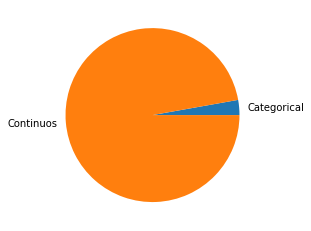

In [71]:
plt.pie(
    [
        len(cat_features),
        len(cont_features)
    ],
    labels = [ 
        "Categorical",
        "Continuos"
    ]
)

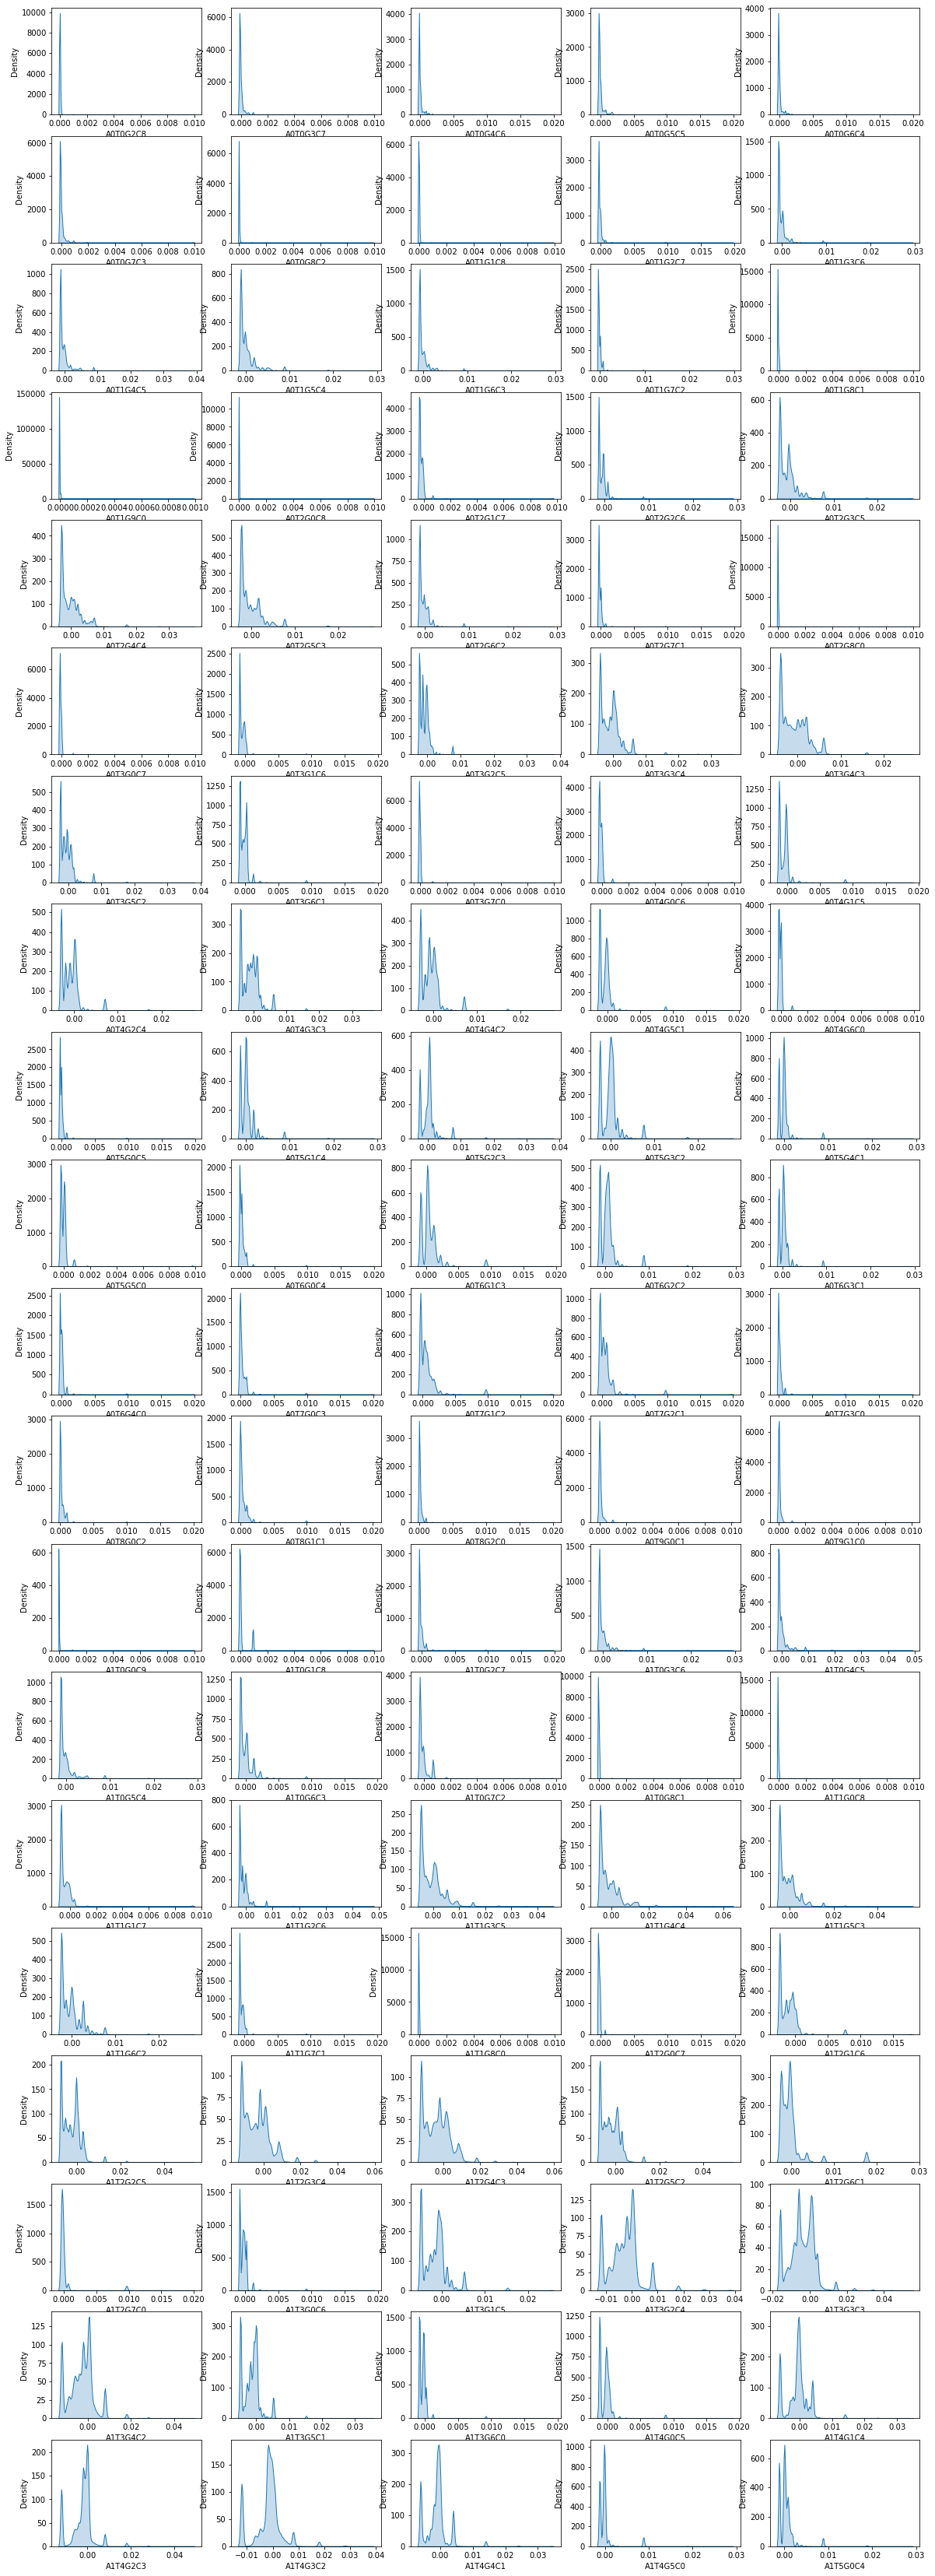

In [74]:
ncols = 5
nrows = 20

n_feautures = cont_features[:100]

fig, axes = plt.subplots(
    nrows,
    ncols,
    figsize = (20, 15*4)
)

for r in range(nrows):
    for c in range(ncols):
        col = n_feautures[r*ncols+c]
        sns.kdeplot(
            x = train_df[col],
            ax = axes[r,c],
            label = "Train data",
            fill = True
        )

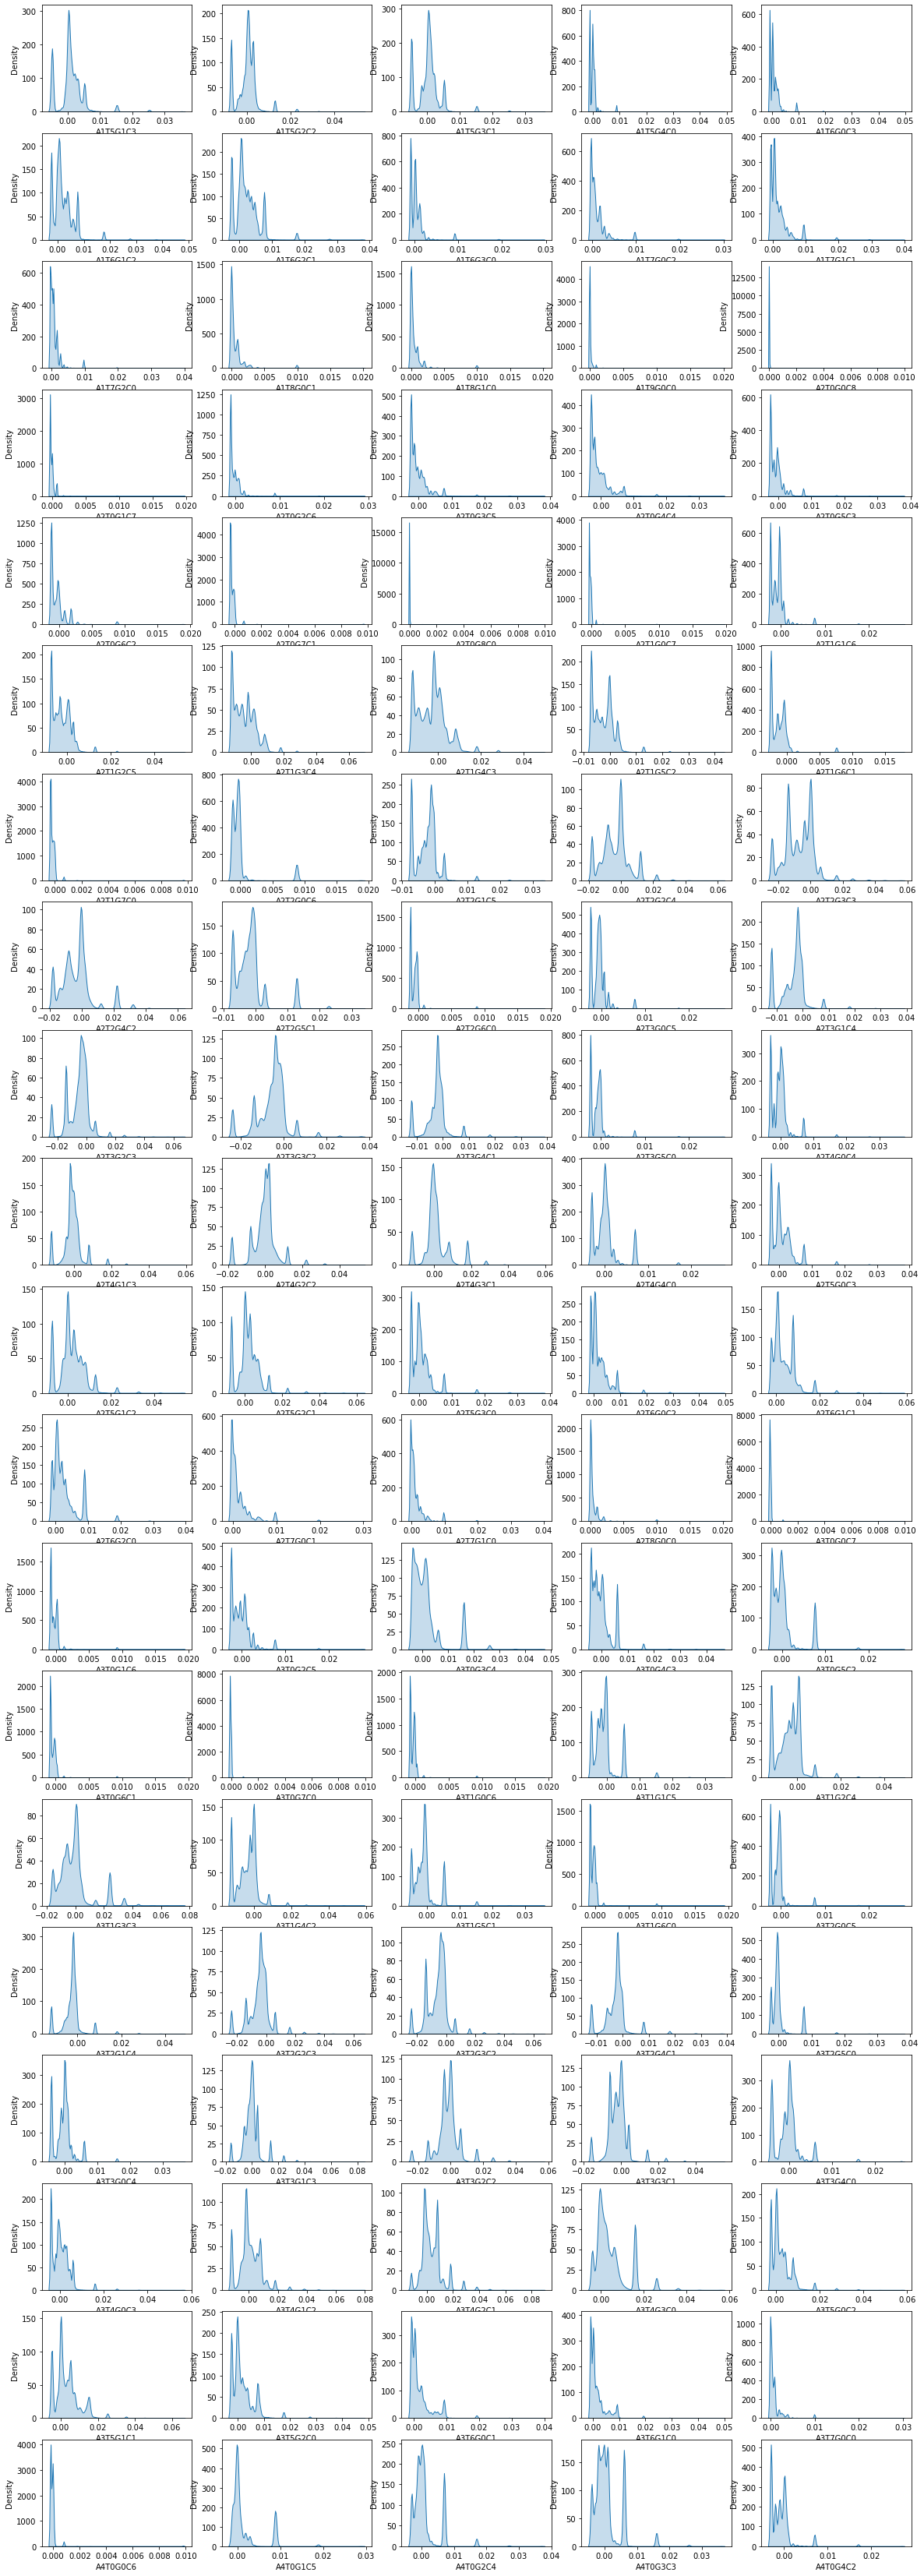

In [75]:
n_feautures = cont_features[100:200]

fig, axes = plt.subplots(
    nrows,
    ncols,
    figsize = (20, 15*4)
)

for r in range(nrows):
    for c in range(ncols):
        col = n_feautures[r*ncols+c]
        sns.kdeplot(
            x = train_df[col],
            ax = axes[r,c],
            label = "Train data",
            fill = True
        )

IndexError: list index out of range

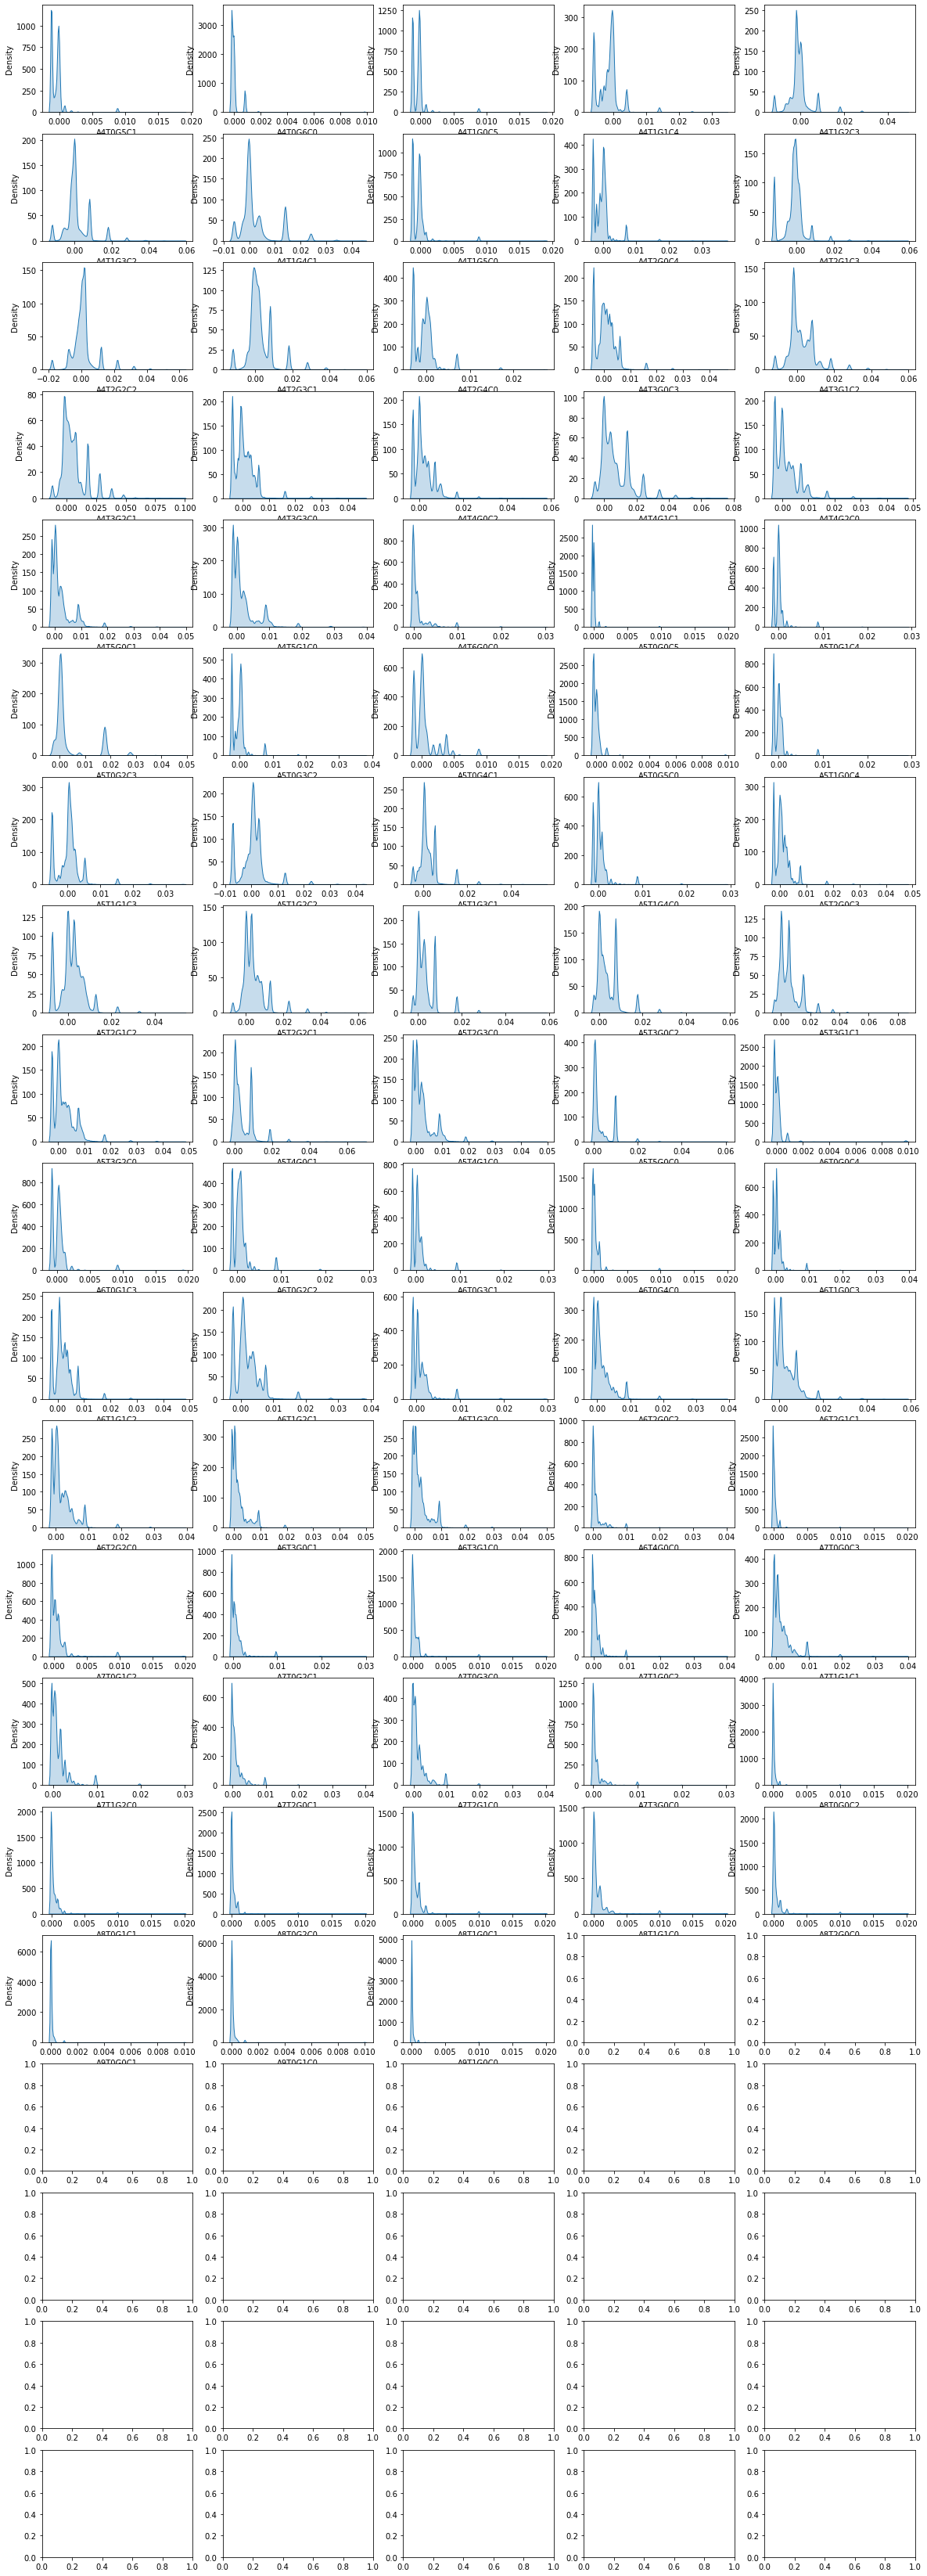

In [76]:
n_feautures = cont_features[200:]

fig, axes = plt.subplots(
    nrows,
    ncols,
    figsize = (20, 15*4)
)

for r in range(nrows):
    for c in range(ncols):
        col = n_feautures[r*ncols+c]
        sns.kdeplot(
            x = train_df[col],
            ax = axes[r,c],
            label = "Train data",
            fill = True
        )

In [87]:
target_df = pd.DataFrame(train_df[TARGET].value_counts()) \
    .reset_index() \
    .rename({"index":TARGET, TARGET:"count"}, axis=1)

target_df["%"] = target_df["count"]/train_df.shape[0]

target_df

,target,count,%
0,Bacteroides_fragilis,20139,0.100695
1,Streptococcus_pyogenes,20076,0.100380
2,Streptococcus_pneumoniae,20074,0.100370
3,Campylobacter_jejuni,20063,0.100315
4,Salmonella_enterica,20030,0.100150
5,Escherichia_coli,19958,0.099790
6,Enterococcus_hirae,19947,0.099735
7,Escherichia_fergusonii,19937,0.099685
8,Staphylococcus_aureus,19929,0.099645
9,Klebsiella_pneumoniae,19847,0.099235


<BarContainer object of 10 artists>

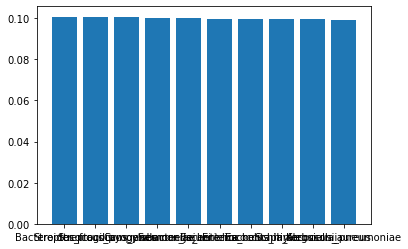

In [91]:
plt.bar(
    x = target_df["target"],
    height = target_df["%"]
)

In [93]:
train_df["mean"] = train_df[FEATURES].mean(axis=1)
train_df["std"] = train_df[FEATURES].std(axis=1)
train_df["min"] = train_df[FEATURES].min(axis=1)
train_df["max"] = train_df[FEATURES].max(axis=1)

train_df

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,mean,std,min,max
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,2.767028e-17,0.005643,-0.014033,0.023992
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica,1.129996e-17,0.001751,-0.005016,0.008984
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,Salmonella_enterica,-1.785171e-18,0.000601,-0.002587,0.002327
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,Salmonella_enterica,-4.829865e-19,0.001160,-0.005403,0.004602
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Enterococcus_hirae,2.872491e-17,0.007117,-0.024033,0.037984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,Salmonella_enterica,-2.634806e-19,0.000856,-0.003933,0.003072
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes,1.271170e-17,0.002181,-0.009033,0.009984
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,Streptococcus_pneumoniae,-1.639088e-18,0.000667,-0.003222,0.001641
199998,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,Staphylococcus_aureus,1.172682e-17,0.001843,-0.007016,0.007995


In [94]:
FEATURES.extend(['mean', 'std', 'min', 'max'])

FEATURES

['A0T0G0C10',
 'A0T0G1C9',
 'A0T0G2C8',
 'A0T0G3C7',
 'A0T0G4C6',
 'A0T0G5C5',
 'A0T0G6C4',
 'A0T0G7C3',
 'A0T0G8C2',
 'A0T0G9C1',
 'A0T0G10C0',
 'A0T1G0C9',
 'A0T1G1C8',
 'A0T1G2C7',
 'A0T1G3C6',
 'A0T1G4C5',
 'A0T1G5C4',
 'A0T1G6C3',
 'A0T1G7C2',
 'A0T1G8C1',
 'A0T1G9C0',
 'A0T2G0C8',
 'A0T2G1C7',
 'A0T2G2C6',
 'A0T2G3C5',
 'A0T2G4C4',
 'A0T2G5C3',
 'A0T2G6C2',
 'A0T2G7C1',
 'A0T2G8C0',
 'A0T3G0C7',
 'A0T3G1C6',
 'A0T3G2C5',
 'A0T3G3C4',
 'A0T3G4C3',
 'A0T3G5C2',
 'A0T3G6C1',
 'A0T3G7C0',
 'A0T4G0C6',
 'A0T4G1C5',
 'A0T4G2C4',
 'A0T4G3C3',
 'A0T4G4C2',
 'A0T4G5C1',
 'A0T4G6C0',
 'A0T5G0C5',
 'A0T5G1C4',
 'A0T5G2C3',
 'A0T5G3C2',
 'A0T5G4C1',
 'A0T5G5C0',
 'A0T6G0C4',
 'A0T6G1C3',
 'A0T6G2C2',
 'A0T6G3C1',
 'A0T6G4C0',
 'A0T7G0C3',
 'A0T7G1C2',
 'A0T7G2C1',
 'A0T7G3C0',
 'A0T8G0C2',
 'A0T8G1C1',
 'A0T8G2C0',
 'A0T9G0C1',
 'A0T9G1C0',
 'A0T10G0C0',
 'A1T0G0C9',
 'A1T0G1C8',
 'A1T0G2C7',
 'A1T0G3C6',
 'A1T0G4C5',
 'A1T0G5C4',
 'A1T0G6C3',
 'A1T0G7C2',
 'A1T0G8C1',
 'A1T0G9C0',
 'A1T1G0C

In [95]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df[TARGET] = encoder.fit_transform(train_df[TARGET])

In [96]:
train_df

,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,...,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target,mean,std,min,max
0,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,9,2.767028e-17,0.005643,-0.014033,0.023992
1,-9.536743e-07,-9.536743e-06,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,6,1.129996e-17,0.001751,-0.005016,0.008984
2,-9.536743e-07,-1.536743e-06,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-6.536743e-06,...,0.000072,1.046326e-05,0.000008,0.000019,1.046326e-06,6,-1.785171e-18,0.000601,-0.002587,0.002327
3,4.632568e-08,-5.536743e-06,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-6.536743e-06,...,0.000153,2.146326e-05,0.000015,0.000046,-9.536743e-07,6,-4.829865e-19,0.001160,-0.005403,0.004602
4,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,2,2.872491e-17,0.007117,-0.024033,0.037984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-9.536743e-07,4.632568e-07,-0.000003,0.000176,0.000350,0.000290,0.000200,0.000206,-0.000023,-9.536743e-06,...,0.000027,4.632568e-07,0.000060,0.000020,-9.536743e-07,6,-2.634806e-19,0.000856,-0.003933,0.003072
199996,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,9,1.271170e-17,0.002181,-0.009033,0.009984
199997,4.632568e-08,1.463257e-06,-0.000005,-0.000031,-0.000019,-0.000037,-0.000037,-0.000015,-0.000005,-7.536743e-06,...,0.000094,1.646326e-05,0.000035,0.000021,4.632568e-08,8,-1.639088e-18,0.000667,-0.003222,0.001641
199998,-9.536743e-07,-9.536743e-06,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-9.536743e-06,...,-0.000043,-9.536743e-06,-0.000010,-0.000010,-9.536743e-07,7,1.172682e-17,0.001843,-0.007016,0.007995


In [99]:
xgb_params = {
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    }

FOLDS = 5
RANDOM_STATE = 12

In [100]:
xgb_predictions = []
xgb_scores = []
xgb_fimp = []

In [101]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)

In [104]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import time

for fold, (train_idx, valid_idx) in enumerate(skf.split(train_df[FEATURES], train_df[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train_df.iloc[train_idx][FEATURES], train_df.iloc[valid_idx][FEATURES]
    y_train , y_valid = train_df[TARGET].iloc[train_idx] , train_df[TARGET].iloc[valid_idx]
    
    model = XGBClassifier(**xgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    xgb_scores.append(acc)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, Accuracy: {acc:.2f}, Run Time: {run_time:.2f}s")
    test_preds = model.predict(test_df[FEATURES])
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    xgb_fimp.append(fim)
    xgb_predictions.append(test_preds)
    
print("Mean Accuracy :", np.mean(xgb_scores))

========== Fold=1 ==========
[06:31:45] WARNING: ../src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [06:31:45] ../src/gbm/gbtree.cc:531: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x179639) [0x7fce8b4be639]
  [bt] (1) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x179c6a) [0x7fce8b4bec6a]
  [bt] (2) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x17a3ba) [0x7fce8b4bf3ba]
  [bt] (3) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x1b48c5) [0x7fce8b4f98c5]
  [bt] (4) /opt/conda/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x68) [0x7fce8b3de4f8]
  [bt] (5) /opt/conda/lib/python3.9/lib-dynload/../../libffi.so.7(+0x69dd) [0x7fcfbc75a9dd]
  [bt] (6) /opt/conda/lib/python3.9/lib-dynload/../../libffi.so.7(+0x6067) [0x7fcfbc75a067]
  [bt] (7) /opt/conda/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x140f6) [0x7fcfbc7740f6]
  [bt] (8) /opt/conda/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x1073e) [0x7fcfbc77073e]

